# Pseudorandom Number Generators

A crucial problem in computational stastistics is how to draw a sample from a given distribution. Theoretically, if we were able to sample from a a Uniform distribution on $(0,1)$ we could sample from others distributions. Therefore a natural question is: "How can we sample from a Uniform distribution on $(0,1)$?"

For that we need Pseudorandom Number Generators, a class of algorithms used to generate a sequence of numbers whose properties resembles the properties of random numbers. However, the numbers generated cannot be truly random, since computers are deterministic machines and the pseudorandom sequence of numbers entirely depends on an initial value called *seed*.



### Linear Congruential Generator

The first PRNG we will consider is the Linear Congruential Generator, one of the oldest methods to generate sequences of pseudorandom numbers and also one of the easieast to understand and implement.

Given a *modulus* $m > 0$, a *multiplier* $a$ such that $0 < a < m$, an *increment* $c$ such that $0 \leq c < m$ and a *seed* $X_0$ such that $0 \leq X_0 < m$, the algorithm is defined by the recurrence relation:

$$X_{n+1} = (aX_n + c) \mod m$$

The algorithm generates integers between 0 and m. If we want to generate numbers from a *Uniform(0,1)* it is sufficient to divide the output by m.

In [41]:
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
def rand_lgc(m, a, c, seed):
    while True:
        seed = (a * seed + c) % m
        yield seed / m

The quality of the output is of course very sensitive to the choice of $a$ and $m$. Since a discussion on the choice of these values is out of the scope of this notebook, we will just set for convenience values taken from the series of books *"Numerical Recipes", Press et al."*. In particular we set:
- $m = 2^{32}$
- $a = 1664525$
- $c = 1013904223$

Let's create a sample of uniformly distributed numbers between 0 and 1.

In [48]:
m = 2**32
a = 1664525
c = 1013904223
seed = 12
random.seed(seed)

sample = []
n = 100000
i = 0
for number in lcg(m, a, c, seed):
    if i == n:
        break
    sample.append(number)
    i += 1

Let's compare the output of the Linear Congruential Generator with the output of the random number generator of Python, which implements a version of the Mersenne-Twister algorithm.

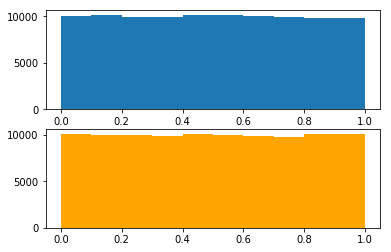

In [51]:
fig, ax = plt.subplots(2)

ax[0].hist(sample);
ax[1].hist([random.random() for i in range(n)], color='orange');

In [52]:
%timeit rand_lgc(m, a, c, seed)
%timeit random.random()

326 ns ± 3.96 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
90.2 ns ± 2.47 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


The two samples look similar and they both look uniformly distributed between 0 and 1. However, the Mersenne-Twister algorithm used in Python's standard random lybrary is significantly faster.

### References

- Notes on Computational Statistics, Rebecca Graziani
- https://docs.python.org/3/library/random.html
- https://en.wikipedia.org/wiki/Linear_congruential_generator
- https://statweb.stanford.edu/~owen/mc/Ch-unifrng.pdf